# 특성공학

- 차원 축소
- SelectKBest
- PCA
- t-SNE

# 차원축소
## 차원 선택(축소) 방법
- 1) 사람이 경험으로 선택하는 방법
- 2) SelectKBest: 목적 변수와의 상관 관계가 큰 입력 변수 선택
- 3) PCA: 입력 변수들 간의 독립적인 성분을 기준으로 차원을 축소

## 시각화를 위한 차원 축소
- tSNE: 시각화를 위한 2또는 3차원 차원 축소 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (5,5)
matplotlib.rcParams.update({'font.size': 13})

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [3]:
## 유방암 발생 데이터 다운로드

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
print(X.shape)
X[:3].T[:10]

(569, 30)


,0,1,2
mean radius,17.99000,20.57000,19.69000
mean texture,10.38000,17.77000,21.25000
mean perimeter,122.80000,132.90000,130.00000
mean area,1001.00000,1326.00000,1203.00000
mean smoothness,0.11840,0.08474,0.10960
mean compactness,0.27760,0.07864,0.15990
mean concavity,0.30010,0.08690,0.19740
mean concave points,0.14710,0.07017,0.12790
mean symmetry,0.24190,0.18120,0.20690
mean fractal dimension,0.07871,0.05667,0.05999


## 교차 검증 k=5


In [4]:
## 교차 검증을 수행하는 함수 정의

# n개 세트의 훈련용과 검증용 데이터를 랜덤하게 나눈다
def cross_validation(model, X, y, n=5): 
    cv = KFold(n, shuffle=True)
    return cross_val_score(model, X, y, cv=cv).mean().round(4)

## 30개의 특성을 모두 사용하는 경우

In [5]:
## 30개 특성을 이용한 랜덤 포레스트 이진 분류

rfc = RandomForestClassifier()
cross_validation(rfc, X, y)

0.9596

# SelectKBest

- 목적변수 y와의 상관 관계가 큰 특성을 k개 선택
- 6개의 특성을 선택

In [6]:
## 목적변수 y와의 상관 관계가 큰 특성을 k개 선택

from sklearn.feature_selection import SelectKBest, chi2
sb = SelectKBest(chi2, k=2)
X_best = sb.fit_transform(X, y)
print(X_best.shape)

# 선택된 특성 컬럼명 보기
print('Selected Features: ')
print(list(X.columns[sb.get_support()]))
cross_validation(rfc, X_best, y)

(569, 2)
Selected Features: 
['mean area', 'worst area']


0.9279

## 2개의 특성만 사용하는 경우

In [7]:
# sb = SelectKBest(chi2, k=2)
# X_best = sb.fit_transform(X, y)
# print(X.columns[sb.get_support()])
# cross_validation(rfc, X_best, y)

## 두개 특성의 산포도 그리기

In [8]:
# X_best = np.log(X_best)

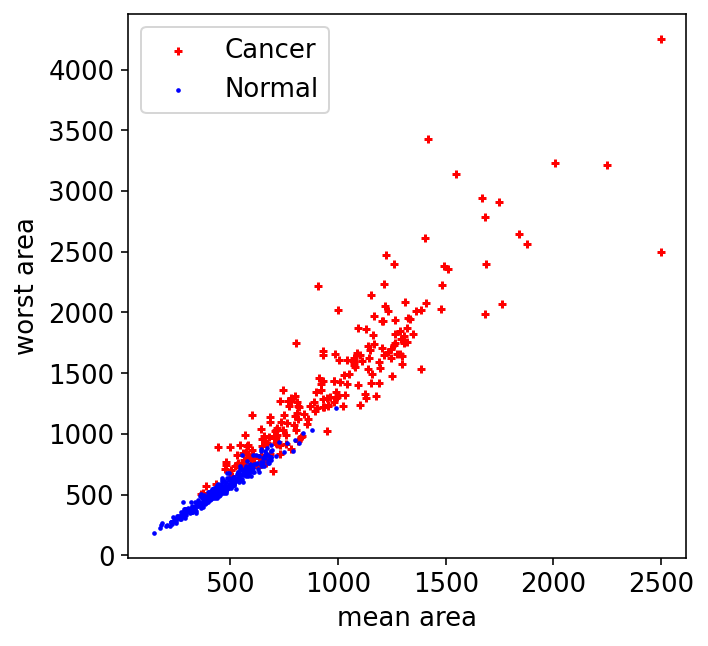

In [9]:
## 두 개 특성의 산포도 그리기

plt.scatter(X_best[:,0][y==0],X_best[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer')
plt.scatter(X_best[:,0][y==1],X_best[:,1][y==1],
            marker='.', s=7, color='b', label='Normal')
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.legend()
plt.savefig('p302.pdf')


# PCA를 사용한 차원 축소
## 6개의 주성분 사용

0.9228


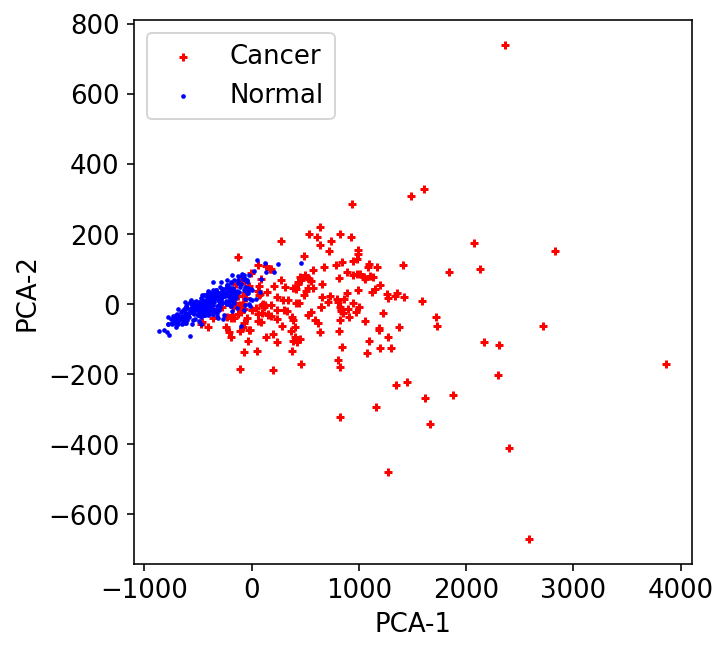

In [10]:
## 2개의 주성분(PCA) 사용 결과

pca = PCA(2)
X_pca = pca.fit_transform(X)
print(cross_validation(rfc, X_pca, y))

# 두 개 주성분을 축으로 산포도 그리기
plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer')
plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1],
            marker='.', s=7, color='b', label='Normal')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.legend()

In [11]:
sum(pca.explained_variance_ratio_)

0.9982211613741733

## pca 생성에 사용한 가중치

In [12]:
## pca 생성에 사용한 가중치

print(pca.components_.round(3))

[[ 0.005  0.002  0.035  0.517  0.     0.     0.     0.     0.    -0.
   0.    -0.     0.002  0.056 -0.     0.     0.     0.    -0.    -0.
   0.007  0.003  0.049  0.852  0.     0.     0.     0.     0.     0.   ]
 [ 0.009 -0.003  0.063  0.852 -0.    -0.     0.     0.    -0.    -0.
  -0.     0.     0.001  0.008  0.     0.     0.     0.     0.     0.
  -0.001 -0.013 -0.    -0.52  -0.    -0.    -0.    -0.    -0.    -0.   ]]


# t-SNE 시각화
- perplexity를 바꾸면 그림이 다르게 나타난다

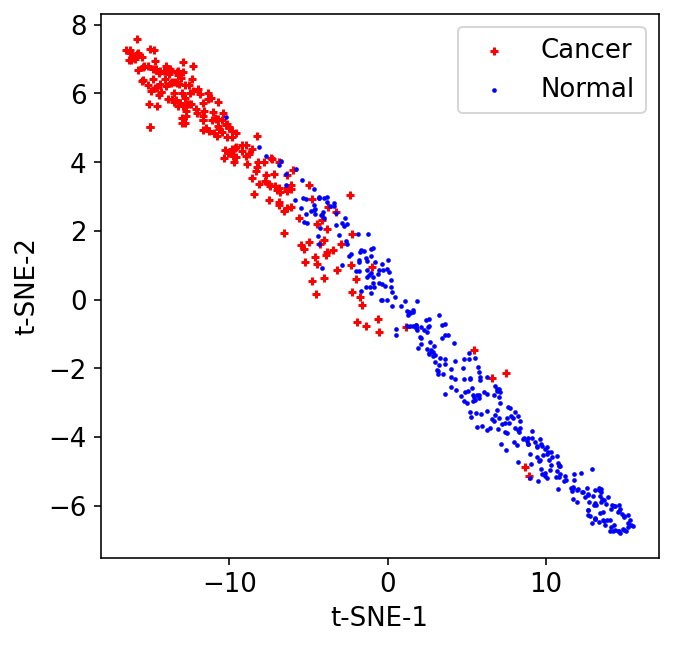

In [13]:
## 2차원 t-SNE 수행과 시각화

tsne = TSNE(2, perplexity=100)
tsne_2 = tsne.fit_transform(X)


plt.scatter(tsne_2[:,0][y==0],tsne_2[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer')
plt.scatter(tsne_2[:,0][y==1],tsne_2[:,1][y==1],
            marker='.', s=7, color='b', label='Normal')

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.legend()